# AprilTags!

This notebook will provide a basic introduction to detecting AprilTags using a handy python library and some applications in which we use AprilTags.

In the most recent season, FRC transitioned from using reflective tape as vision targets to April Tags. April Tags are useful because they give us more positional information about our orientation on the field. This can be used to do precise automatic functions in teleop and track our position in autonomous.

We'll be using the apriltag python library along with openCV to dive deeper into april tags.

## Using the Python apriltag library
Let's first import the necessary packages

In [ ]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

!pip install apriltag
import apriltag

plt.rcParams["figure.figsize"] = (12, 9)

print("Import done!")

! git clone https://github.com/Tino-FRC-2473/CVTraining repo_files

Let's get an image of april tags!

In [ ]:
img_path = 'repo_files/data/apriltag1.jpg'
img_bgr = cv2.imread(img_path)
img_bgr = cv2.resize(img_bgr, (720, 960))
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
img_gray = cv2.resize(img_gray, (720, 960))
plt.imshow(img_gray, cmap='gray')
plt.show()

Let's set up the detector object that identifies april tags in the given image. The detector object can detect tags of the given april tag family, which contains a set of patterns. The family used by FRC is the 16h5 family.

In [ ]:
options = apriltag.DetectorOptions(families="tag16h5")
detector = apriltag.Detector(options)

Now let's run a prediction on the image with the detector!

In [ ]:
results = detector.detect(img_gray)
print("[INFO] {} total AprilTags detected".format(len(results)))

Now we need to visualize the detector's results

In [ ]:
# loop over the AprilTag detection results
for r in results:
	# extract the bounding box (x, y)-coordinates for the AprilTag
	# and convert each of the (x, y)-coordinate pairs to integers
	(ptA, ptB, ptC, ptD) = r.corners
	ptB = (int(ptB[0]), int(ptB[1]))
	ptC = (int(ptC[0]), int(ptC[1]))
	ptD = (int(ptD[0]), int(ptD[1]))
	ptA = (int(ptA[0]), int(ptA[1]))
	# draw the bounding box of the AprilTag detection
	cv2.line(img_bgr, ptA, ptB, (0, 255, 0), 2)
	cv2.line(img_bgr, ptB, ptC, (0, 255, 0), 2)
	cv2.line(img_bgr, ptC, ptD, (0, 255, 0), 2)
	cv2.line(img_bgr, ptD, ptA, (0, 255, 0), 2)
	# draw the center (x, y)-coordinates of the AprilTag
	(cX, cY) = (int(r.center[0]), int(r.center[1]))
	cv2.circle(img_bgr, (cX, cY), 5, (0, 0, 255), -1)
	# draw the tag family on the image
	tagFamily = r.tag_family.decode("utf-8")
	cv2.putText(img_bgr, tagFamily, (ptA[0], ptA[1] - 15),
		cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
	print("[INFO] tag family: {}".format(tagFamily))
# show the output image after AprilTag detection
plt.imshow(img_bgr)
#plt.show()

## Applications

Now let's try implementing an application of detecting an AprilTag! We'll try writing code to align the camera with the apriltag. The goal is to print out whether the camera is aligned or not. To do that, we need to understand the types of 3d rotational fields there are. Here's a diagram of the three Euler angles (pitch, yaw, and roll) that can represent any rotation in 3D. For horizontal alignment, we would use yaw.

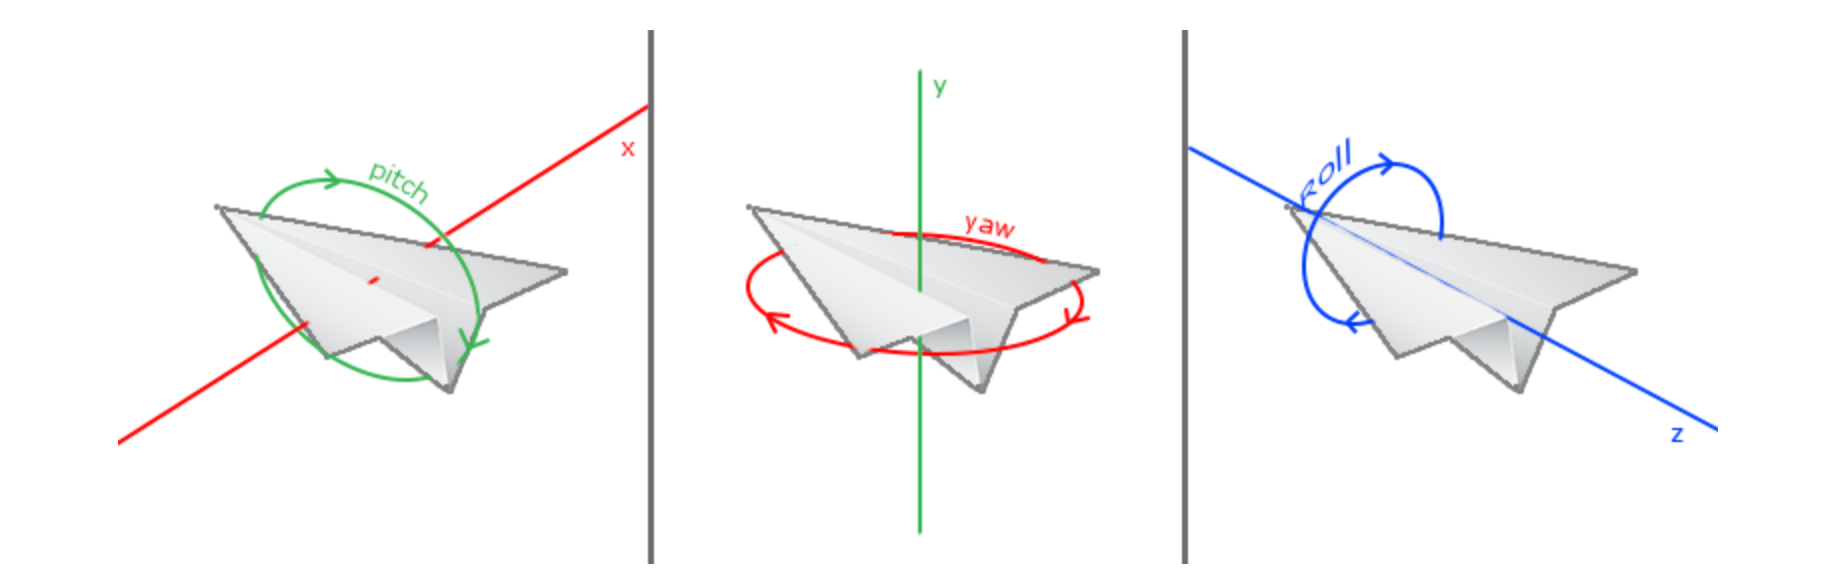

In [ ]:
import math
#field of view
FOV_X = 70
FOV_Y = 70
#Heights from ground in inches
APRIL_TAG_HEIGHT = 24
CAMERA_HEIGHT  = 18
def get_yaw_degrees(result, img):
  #get the 4 points of the april tag
  (ptA, ptB, ptC, ptD) = result.corners
  #find the center point of the tag
  center_tag = ((ptA[0]+ptC[0])/2, (ptA[1]+ptC[1])/2)
  #find the center point of the camera
  center_cam = (len(img[0])/2, len(img)/2)
  #calculate the horizontal difference between the center point of the tag and the point of the camera
  B = center_tag[0] - center_cam[0]
  #calculate horizontal center of camera
  A = len(img[0])/2
  #calculate yaw (look at the diagram below to understand the calculation)
  theta = math.atan(B * math.tan(math.radians(FOV_X / 2)) / A)
  return math.degrees(theta)

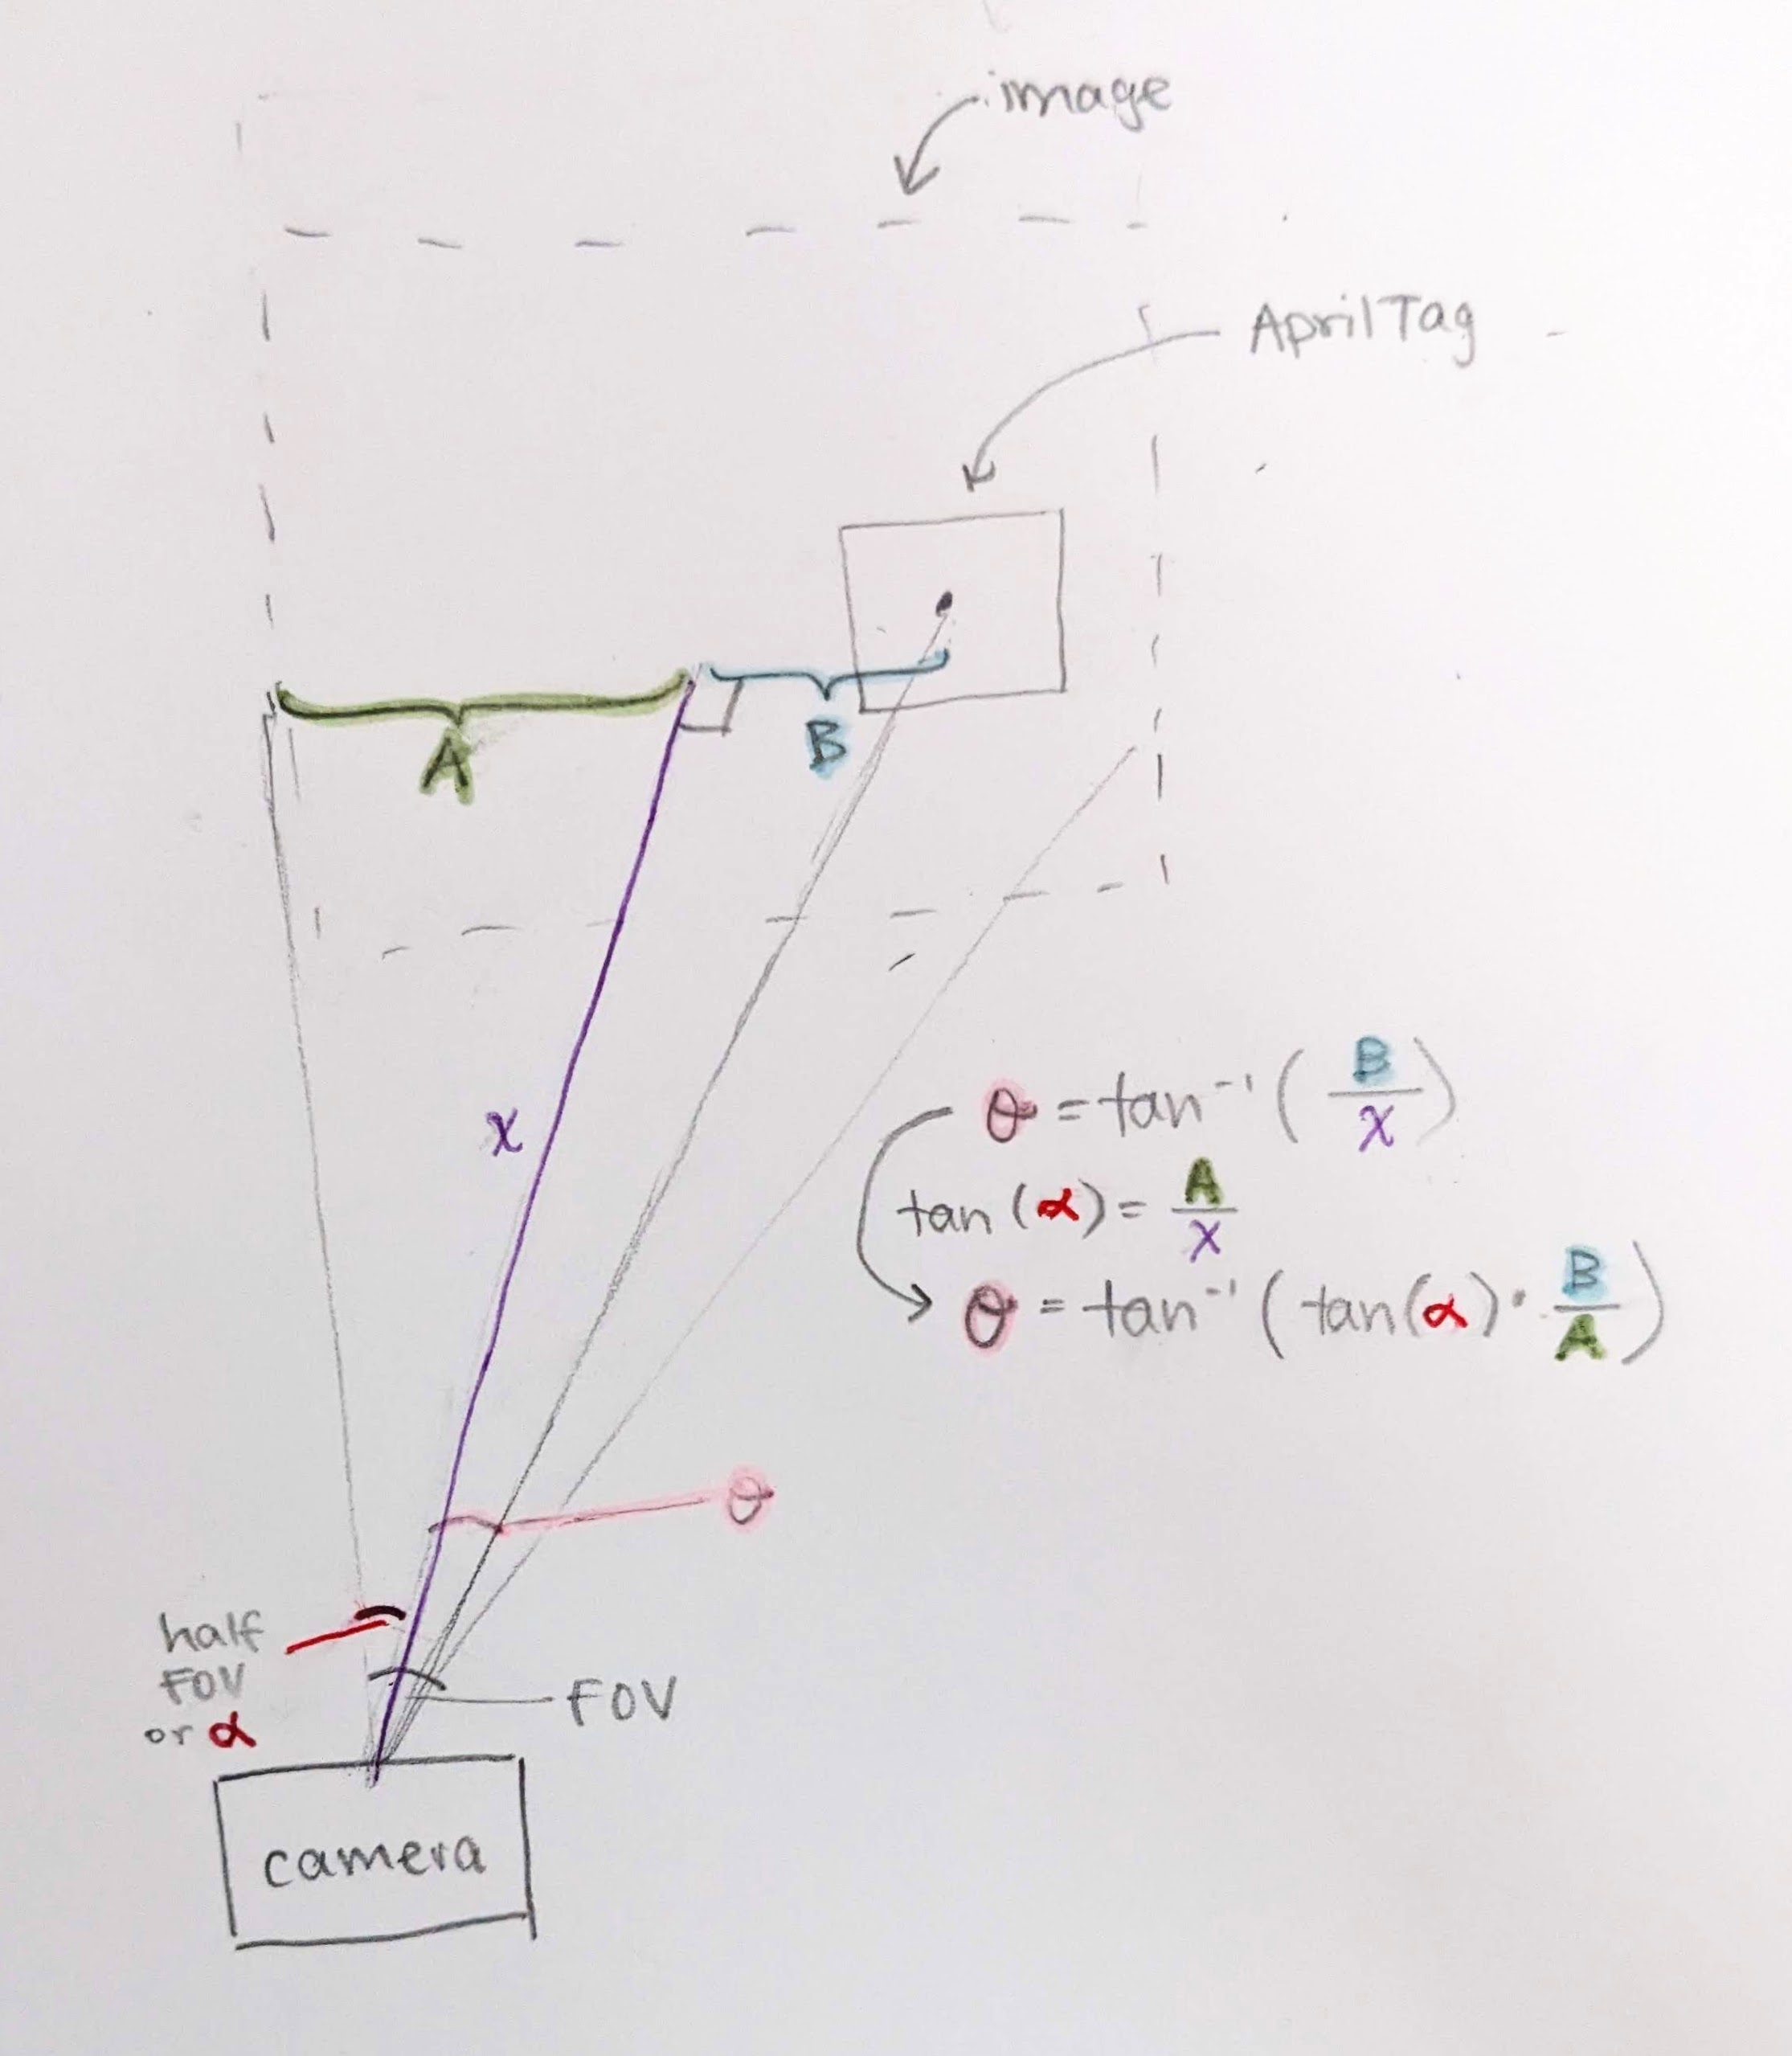

Now, lets try to write some similar code for finding the pitch (vertical angle).

In [ ]:
def get_pitch_degrees(result, img):
  #WRITE CODE HERE
  #get the 4 points of the april tag
  (ptA, ptB, ptC, ptD) =
  #find the center point of the tag
  center_tag =
  #find the center point of the camera
  center_cam =
  #calculate the vertical difference between the center point of the tag and the point of the camera
  B =
  #calculate vertical center of camera
  A =
  #calculate pitch
  theta =
  return math.degrees(theta)